In [12]:
import cv2 as cv
import numpy as np

# Initialize list to store points and a counter
points = []
N = 4  # Number of points to select

# Load images
building_image = cv.imread('005.jpg')
flag_image = cv.imread('flag.png')

# Mouse callback function to select points
def selecting_points(event, x, y, flags, param):
    global points
    if event == cv.EVENT_LBUTTONDOWN and len(points) < N:
        # Append the selected point to the list
        points.append((x, y))
        # Draw a small circle where the point was selected
        cv.circle(building_image, (x, y), 5, (0, 0, 255), -1)
        # Display the updated image with selected points
        cv.imshow('Building', building_image)
        # Close the window after selecting 4 points
        if len(points) == N:
            cv.destroyAllWindows()

# Create a window to display the image
cv.namedWindow('Building', cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Building', selecting_points)

# Display the image and wait for the user to select points
while len(points) < N:
    cv.imshow('Building', building_image)
    if cv.waitKey(1) & 0xFF == 27:  # Exit if 'Esc' key is pressed
        break

cv.destroyAllWindows()

# Output the selected points
print("Selected points:", points)




Selected points: [(219, 154), (466, 304), (467, 540), (202, 534)]


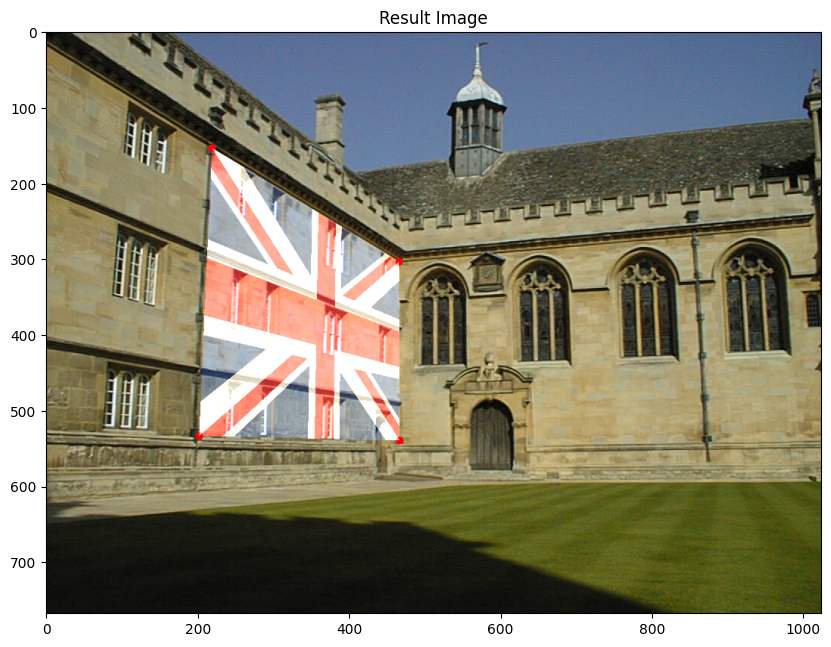

In [13]:
import cv2
import matplotlib.pyplot as plt
dst_points = np.array(points, dtype=np.float32)  # Ensure points are float32

# Step 2: Define source points (corners of the flag image)
h, w = flag_image.shape[:2]
src_points = np.array([(0, 0), (w, 0), (w, h), (0, h)], dtype=np.float32)

# Step 3: Compute homography
H, _ = cv2.findHomography(src_points, dst_points)

# Step 4: Warp the flag image using the computed homography
warped_flag = cv2.warpPerspective(flag_image, H, (building_image.shape[1], building_image.shape[0]))

# Blend the warped flag image with the architectural image
result_image = cv2.addWeighted(building_image, 1, warped_flag, 0.7, 0)

# Step 5: Create a mask for the warped flag
gray_warped = cv2.cvtColor(warped_flag, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray_warped, 1, 255, cv2.THRESH_BINARY)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title('Result Image')
plt.show()

In [27]:
import cv2 as cv
import numpy as np

# Initialize list to store points and a counter
points = []
N = 4  # Number of points to select

# Load images
classical_art = cv.imread('pettah.jpg')


# Mouse callback function to select points
def selecting_points(event, x, y, flags, param):
    global points
    if event == cv.EVENT_LBUTTONDOWN and len(points) < N:
        # Append the selected point to the list
        points.append((x, y))
        # Draw a small circle where the point was selected
        cv.circle(classical_art, (x, y), 5, (0, 0, 255), -1)
        # Display the updated image with selected points
        cv.imshow('Building', classical_art)
        # Close the window after selecting 4 points
        if len(points) == N:
            cv.destroyAllWindows()

# Create a window to display the image
cv.namedWindow('Building', cv.WINDOW_AUTOSIZE)
cv.setMouseCallback('Building', selecting_points)

# Display the image and wait for the user to select points
while len(points) < N:
    cv.imshow('Building', classical_art)
    if cv.waitKey(1) & 0xFF == 27:  # Exit if 'Esc' key is pressed
        break

cv.destroyAllWindows()

# Output the selected points
print("Selected points:", points)

Selected points: [(187, 203), (284, 204), (289, 407), (195, 405)]


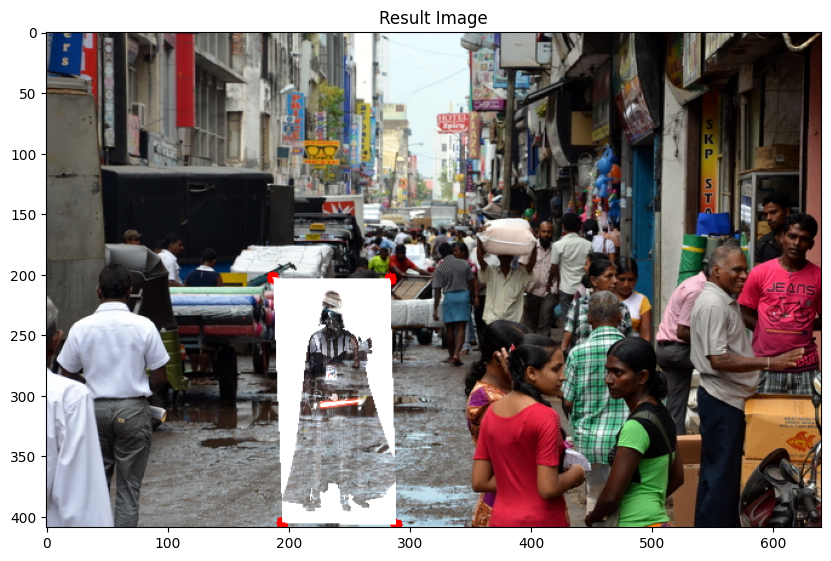

In [28]:
import cv2
import matplotlib.pyplot as plt
dst_points = np.array(points, dtype=np.float32)  # Ensure points are float32

flag_image = cv.imread('authentic-darth-vader-costume.jpg')
# Step 2: Define source points (corners of the flag image)
h, w = flag_image.shape[:2]
src_points = np.array([(0, 0), (w, 0), (w, h), (0, h)], dtype=np.float32)

# Step 3: Compute homography
H, _ = cv2.findHomography(src_points, dst_points)

# Step 4: Warp the flag image using the computed homography
warped_flag = cv2.warpPerspective(flag_image, H, (classical_art.shape[1], classical_art.shape[0]))

# Blend the warped flag image with the architectural image
result_image = cv2.addWeighted(classical_art, 1, warped_flag, 1, 0)
# Step 5: Create a mask for the warped flag
gray_warped = cv2.cvtColor(warped_flag, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray_warped, 1, 255, cv2.THRESH_BINARY)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title('Result Image')
plt.show()